Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-2-Applied-Modeling/master/data/Restaurant_Consumer_Data_merged'

import pandas as pd

df = pd.read_csv(url)

In [2]:
df.head()

,userID,placeID,rating,food_rating,service_rating,Ulatitude,Ulongitude,smoker,drink_level,dress_preference,...,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,U1077,135085,2,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,U1077,135038,2,2,1,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,U1077,132825,2,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,U1077,135060,1,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,U1077,135027,0,1,1,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split

target1 = 'rating'
target2 = 'food_rating'
target3 = 'service_rating'

X = df.drop(columns=[target1, target2, target3])
y1 = df[target1]
y2 = df[target2]
y3 = df[target3]

X_train, X_test= train_test_split(X, test_size=0.2, random_state=7)
y1_train, y1_test,y2_train, y2_test,y3_train, y3_test= train_test_split(y1,y2,y3, test_size=0.2, random_state=7)
X_train.shape, X_test.shape,y1_train.shape, y1_test.shape,y2_train.shape, y2_test.shape,y3_train.shape, y3_test.shape

((928, 495), (233, 495), (928,), (233,), (928,), (233,), (928,), (233,))

In [4]:
print(y1_train.value_counts(normalize=True))
print(y2_train.value_counts(normalize=True))
print(y3_train.value_counts(normalize=True))

2    0.415948
1    0.358836
0    0.225216
Name: rating, dtype: float64
2    0.437500
1    0.329741
0    0.232759
Name: food_rating, dtype: float64
1    0.365302
2    0.358836
0    0.275862
Name: service_rating, dtype: float64


In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy= 'stratified',random_state=7)
y1_pred = dummy.fit(X_train, y1_train).predict(y1_test)
print(accuracy_score(y1_test, y1_pred))
y2_pred = dummy.fit(X_train, y2_train).predict(y2_test)
print(accuracy_score(y2_test, y2_pred))
y3_pred = dummy.fit(X_train, y3_train).predict(y3_test)
print(accuracy_score(y3_test, y3_pred))

0.3218884120171674
0.40772532188841204
0.296137339055794


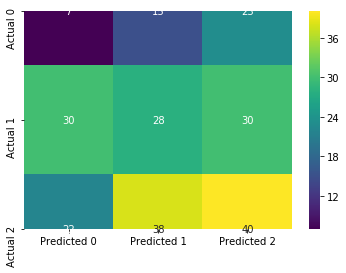

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y1_test, y1_pred);

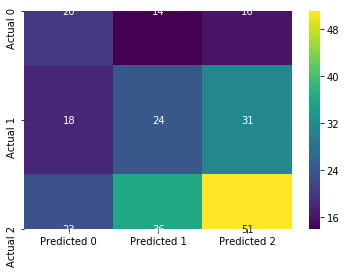

In [17]:
plot_confusion_matrix(y2_test, y2_pred);

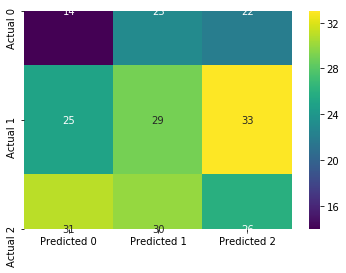

In [8]:
plot_confusion_matrix(y3_test, y3_pred);

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))
print(classification_report(y2_test, y2_pred))
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.12      0.16      0.13        45
           1       0.35      0.32      0.33        88
           2       0.43      0.40      0.41       100

    accuracy                           0.32       233
   macro avg       0.30      0.29      0.29       233
weighted avg       0.34      0.32      0.33       233

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        50
           1       0.32      0.33      0.33        73
           2       0.52      0.46      0.49       110

    accuracy                           0.41       233
   macro avg       0.39      0.40      0.39       233
weighted avg       0.42      0.41      0.41       233

              precision    recall  f1-score   support

           0       0.20      0.24      0.22        59
           1       0.35      0.33      0.34        87
           2       0.32      0.30      0.31        87

    accuracy        

In [10]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

model = XGBClassifier()
print('Baseline for y2_train ', accuracy_score(y1_test, y1_pred))
cross_val_score(model, X_train.drop(columns=['userID','placeID']), y1_train, 
                scoring='accuracy', cv=5, n_jobs=-1)

Baseline for y2_train  0.3218884120171674


array([0.56149733, 0.53763441, 0.55376344, 0.52972973, 0.5326087 ])

In [11]:
model.fit(X_train.drop(columns=['userID','placeID']), y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
# model.predict(y1_test)

In [13]:
model = XGBClassifier()
print('Baseline for y2_train ', accuracy_score(y2_test, y2_pred))
cross_val_score(model, X_train.drop(columns=['userID','placeID']), y2_train, 
                scoring='accuracy', cv=5, n_jobs=-1)

Baseline for y2_train  0.40772532188841204


array([0.59042553, 0.57837838, 0.50810811, 0.61621622, 0.6       ])

In [14]:
model = XGBClassifier()
print('Baseline for y2_train ', accuracy_score(y3_test, y3_pred))
cross_val_score(model, X_train.drop(columns=['userID','placeID']), y3_train, 
                scoring='accuracy', cv=5, n_jobs=-1)

Baseline for y2_train  0.296137339055794


array([0.52406417, 0.54301075, 0.52688172, 0.50810811, 0.55978261])

In [23]:
import category_encoders as ce
#from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    #SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
)

# Fit on train, score on val
print('Baseline for y1_train ', accuracy_score(y1_test, y1_pred))
pipeline.fit(X_train, y1_train)
print('Validation Accuracy', pipeline.score(X_test, y1_test))

Baseline for y1_train  0.3218884120171674
Validation Accuracy 0.648068669527897


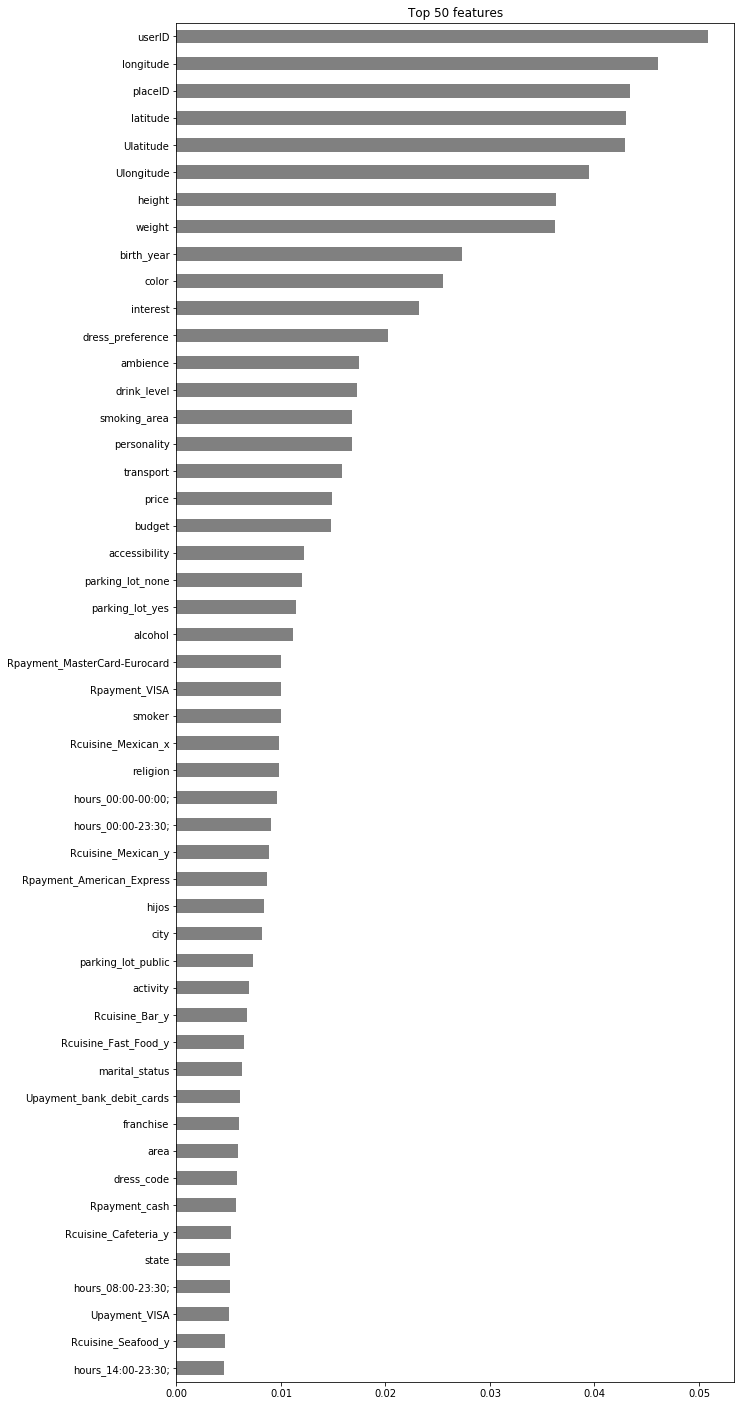

In [26]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [41]:
import eli5
from eli5.sklearn import PermutationImportance
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
#    SimpleImputer(strategy='median')
)

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
model.fit(X_train_transformed, y1_train)

permuter.fit(X_test_transformed, y1_test)

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0086 ± 0.0000,dress_code
0.0060 ± 0.0128,weight
0.0052 ± 0.0100,dress_preference
0.0043 ± 0.0133,placeID
0.0043 ± 0.0000,hours_12:00-23:30;
0.0026 ± 0.0159,Ulongitude
0.0026 ± 0.0042,Rpayment_bank_debit_cards
0.0026 ± 0.0042,parking_lot_public
0.0026 ± 0.0042,Rcuisine_Mexican_y
0.0026 ± 0.0042,Rcuisine_International_y


In [138]:
print('Shape before removing features:', X_train.shape)
minimum_importance = -0.001
mask = permuter.feature_importances_ > minimum_importance
neg_mask = permuter.feature_importances_ < minimum_importance
features1 = X_train.columns[mask]
X1_train = X_train[features1].copy()

print('Shape after removing features:', X1_train.shape)

Shape before removing features: (928, 495)
Shape after removing features: (928, 445)


In [140]:
X1_test = X_test[features1].copy()

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    #SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X1_train, y1_train)
print('Validation Accuracy', pipeline.score(X1_test, y1_test))

Validation Accuracy 0.6566523605150214


In [253]:
encoder = ce.OrdinalEncoder()
X1_train_encoded = encoder.fit_transform(X1_train)
X1_test_encoded = encoder.transform(X1_test)

eval_set = [(X1_train_encoded, y1_train), 
            (X1_test_encoded, y1_test)]

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=5,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.05, # try higher learning rate
    n_jobs=-1
)

model.fit(X1_train_encoded, y1_train, eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds=500)

[0]	validation_0-merror:0.405172	validation_1-merror:0.437768
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 500 rounds.
[1]	validation_0-merror:0.380388	validation_1-merror:0.44206
[2]	validation_0-merror:0.37069	validation_1-merror:0.424893
[3]	validation_0-merror:0.359914	validation_1-merror:0.429185
[4]	validation_0-merror:0.360991	validation_1-merror:0.407725
[5]	validation_0-merror:0.354526	validation_1-merror:0.416309
[6]	validation_0-merror:0.354526	validation_1-merror:0.390558
[7]	validation_0-merror:0.346983	validation_1-merror:0.390558
[8]	validation_0-merror:0.355603	validation_1-merror:0.403433
[9]	validation_0-merror:0.349138	validation_1-merror:0.39485
[10]	validation_0-merror:0.34375	validation_1-merror:0.399142
[11]	validation_0-merror:0.337284	validation_1-merror:0.386266
[12]	validation_0-merror:0.331897	validation_1-merror:0.390558
[13]	validation_0-merror:0.3254

[128]	validation_0-merror:0.201509	validation_1-merror:0.300429
[129]	validation_0-merror:0.201509	validation_1-merror:0.300429
[130]	validation_0-merror:0.201509	validation_1-merror:0.300429
[131]	validation_0-merror:0.201509	validation_1-merror:0.296137
[132]	validation_0-merror:0.201509	validation_1-merror:0.300429
[133]	validation_0-merror:0.200431	validation_1-merror:0.304721
[134]	validation_0-merror:0.201509	validation_1-merror:0.300429
[135]	validation_0-merror:0.200431	validation_1-merror:0.296137
[136]	validation_0-merror:0.199353	validation_1-merror:0.300429
[137]	validation_0-merror:0.199353	validation_1-merror:0.296137
[138]	validation_0-merror:0.198276	validation_1-merror:0.296137
[139]	validation_0-merror:0.197198	validation_1-merror:0.296137
[140]	validation_0-merror:0.197198	validation_1-merror:0.291846
[141]	validation_0-merror:0.195043	validation_1-merror:0.291846
[142]	validation_0-merror:0.195043	validation_1-merror:0.291846
[143]	validation_0-merror:0.19181	valida

[257]	validation_0-merror:0.139009	validation_1-merror:0.339056
[258]	validation_0-merror:0.137931	validation_1-merror:0.334764
[259]	validation_0-merror:0.139009	validation_1-merror:0.339056
[260]	validation_0-merror:0.134698	validation_1-merror:0.339056
[261]	validation_0-merror:0.134698	validation_1-merror:0.339056
[262]	validation_0-merror:0.136853	validation_1-merror:0.339056
[263]	validation_0-merror:0.134698	validation_1-merror:0.334764
[264]	validation_0-merror:0.133621	validation_1-merror:0.334764
[265]	validation_0-merror:0.132543	validation_1-merror:0.334764
[266]	validation_0-merror:0.131466	validation_1-merror:0.334764
[267]	validation_0-merror:0.132543	validation_1-merror:0.334764
[268]	validation_0-merror:0.132543	validation_1-merror:0.334764
[269]	validation_0-merror:0.12931	validation_1-merror:0.334764
[270]	validation_0-merror:0.12931	validation_1-merror:0.334764
[271]	validation_0-merror:0.132543	validation_1-merror:0.339056
[272]	validation_0-merror:0.130388	validat

[386]	validation_0-merror:0.086207	validation_1-merror:0.339056
[387]	validation_0-merror:0.086207	validation_1-merror:0.339056
[388]	validation_0-merror:0.088362	validation_1-merror:0.339056
[389]	validation_0-merror:0.088362	validation_1-merror:0.339056
[390]	validation_0-merror:0.088362	validation_1-merror:0.339056
[391]	validation_0-merror:0.087284	validation_1-merror:0.339056
[392]	validation_0-merror:0.084052	validation_1-merror:0.339056
[393]	validation_0-merror:0.082974	validation_1-merror:0.339056
[394]	validation_0-merror:0.082974	validation_1-merror:0.339056
[395]	validation_0-merror:0.081897	validation_1-merror:0.339056
[396]	validation_0-merror:0.081897	validation_1-merror:0.339056
[397]	validation_0-merror:0.081897	validation_1-merror:0.334764
[398]	validation_0-merror:0.082974	validation_1-merror:0.334764
[399]	validation_0-merror:0.082974	validation_1-merror:0.334764
[400]	validation_0-merror:0.082974	validation_1-merror:0.334764
[401]	validation_0-merror:0.082974	valid

[515]	validation_0-merror:0.051724	validation_1-merror:0.343348
[516]	validation_0-merror:0.051724	validation_1-merror:0.343348
[517]	validation_0-merror:0.051724	validation_1-merror:0.347639
[518]	validation_0-merror:0.052802	validation_1-merror:0.347639
[519]	validation_0-merror:0.052802	validation_1-merror:0.347639
[520]	validation_0-merror:0.050647	validation_1-merror:0.347639
[521]	validation_0-merror:0.050647	validation_1-merror:0.347639
[522]	validation_0-merror:0.050647	validation_1-merror:0.347639
[523]	validation_0-merror:0.048491	validation_1-merror:0.343348
[524]	validation_0-merror:0.046336	validation_1-merror:0.343348
[525]	validation_0-merror:0.045259	validation_1-merror:0.347639
[526]	validation_0-merror:0.045259	validation_1-merror:0.347639
[527]	validation_0-merror:0.046336	validation_1-merror:0.347639
[528]	validation_0-merror:0.045259	validation_1-merror:0.347639
[529]	validation_0-merror:0.045259	validation_1-merror:0.351931
[530]	validation_0-merror:0.046336	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

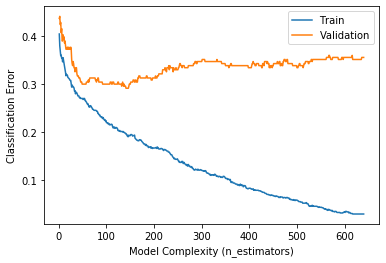

In [254]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

In [166]:
print('Baseline for y2_train ', accuracy_score(y2_test, y2_pred))
pipeline.fit(X_train, y2_train)
print('Validation Accuracy', pipeline.score(X_test, y2_test))

Baseline for y2_train  0.40772532188841204
Validation Accuracy 0.6008583690987125


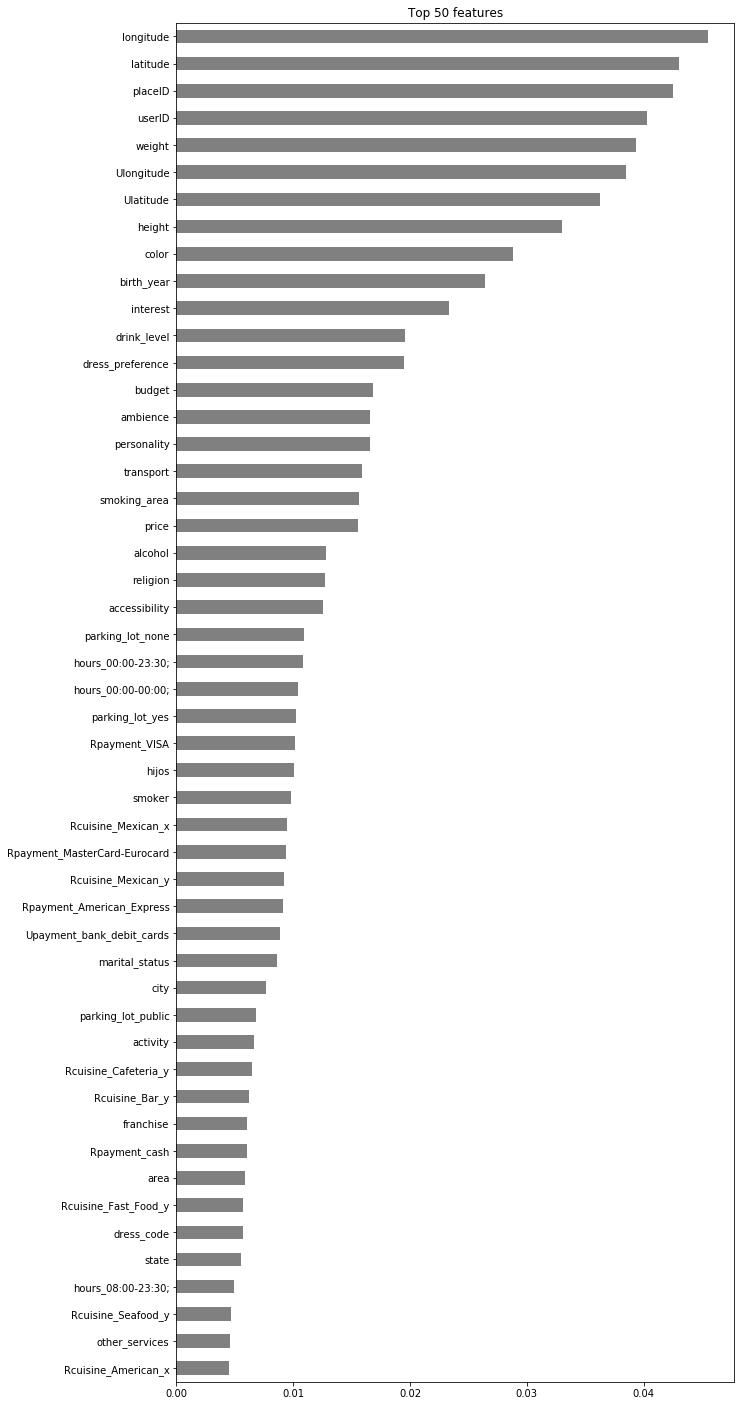

In [142]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [143]:
# import eli5
# from eli5.sklearn import PermutationImportance
# transformers = make_pipeline(
#     ce.OrdinalEncoder(), 
# #    SimpleImputer(strategy='median')
# )

# permuter = PermutationImportance(
#     model, 
#     scoring='accuracy', 
#     n_iter=5, 
#     random_state=42
# )

# X_train_transformed = transformers.fit_transform(X_train)
# X_test_transformed = transformers.transform(X_test)


# model = RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
model.fit(X_train_transformed, y2_train)

permuter.fit(X_test_transformed, y2_test)

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0146 ± 0.0042,Rcuisine_International_y
0.0103 ± 0.0150,weight
0.0086 ± 0.0094,dress_code
0.0086 ± 0.0144,transport
0.0052 ± 0.0034,hours_08:30-21:00;
0.0052 ± 0.0034,Rcuisine_American_x
0.0052 ± 0.0034,franchise
0.0052 ± 0.0148,ambience
0.0043 ± 0.0000,Rcuisine_Seafood_x
0.0043 ± 0.0000,Rcuisine_Burgers_x


In [233]:
print('Shape before removing features:', X_train.shape)
minimum_importance = -0.01
mask = permuter.feature_importances_ > minimum_importance
neg_mask = permuter.feature_importances_ < minimum_importance
features2 = X_train.columns[mask]
X2_train = X_train[features2].copy()

print('Shape after removing features:', X2_train.shape)

Shape before removing features: (928, 495)
Shape after removing features: (928, 484)


In [285]:
X2_test = X_test[features2].copy()

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    #SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X2_train, y2_train)
print('Validation Accuracy', pipeline.score(X2_test, y2_test))

Validation Accuracy 0.6094420600858369


In [280]:
encoder = ce.OrdinalEncoder()
X2_train_encoded = encoder.fit_transform(X2_train)
X2_test_encoded = encoder.transform(X2_test)

eval_set = [(X2_train_encoded, y2_train), 
            (X2_test_encoded, y2_test)]

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=2,       # try deeper trees because of high cardinality categoricals
    learning_rate=1, # try higher learning rate
    n_jobs=-1
)

model.fit(X2_train_encoded, y2_train, eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds=100)

[0]	validation_0-merror:0.493534	validation_1-merror:0.484979
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.470905	validation_1-merror:0.463519
[2]	validation_0-merror:0.44181	validation_1-merror:0.484979
[3]	validation_0-merror:0.423491	validation_1-merror:0.467811
[4]	validation_0-merror:0.381466	validation_1-merror:0.446352
[5]	validation_0-merror:0.353448	validation_1-merror:0.429185
[6]	validation_0-merror:0.336207	validation_1-merror:0.420601
[7]	validation_0-merror:0.335129	validation_1-merror:0.433476
[8]	validation_0-merror:0.330819	validation_1-merror:0.437768
[9]	validation_0-merror:0.330819	validation_1-merror:0.429185
[10]	validation_0-merror:0.321121	validation_1-merror:0.416309
[11]	validation_0-merror:0.313578	validation_1-merror:0.412017
[12]	validation_0-merror:0.30819	validation_1-merror:0.416309
[13]	validation_0-merror:0.29

[128]	validation_0-merror:0.08944	validation_1-merror:0.381974
[129]	validation_0-merror:0.08944	validation_1-merror:0.390558
[130]	validation_0-merror:0.084052	validation_1-merror:0.390558
[131]	validation_0-merror:0.081897	validation_1-merror:0.381974
[132]	validation_0-merror:0.084052	validation_1-merror:0.377682
[133]	validation_0-merror:0.084052	validation_1-merror:0.381974
[134]	validation_0-merror:0.085129	validation_1-merror:0.377682
[135]	validation_0-merror:0.086207	validation_1-merror:0.381974
[136]	validation_0-merror:0.086207	validation_1-merror:0.381974
[137]	validation_0-merror:0.082974	validation_1-merror:0.381974
[138]	validation_0-merror:0.082974	validation_1-merror:0.381974
[139]	validation_0-merror:0.081897	validation_1-merror:0.377682
[140]	validation_0-merror:0.081897	validation_1-merror:0.381974
[141]	validation_0-merror:0.078664	validation_1-merror:0.386266
[142]	validation_0-merror:0.077586	validation_1-merror:0.369099
[143]	validation_0-merror:0.079741	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=-1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

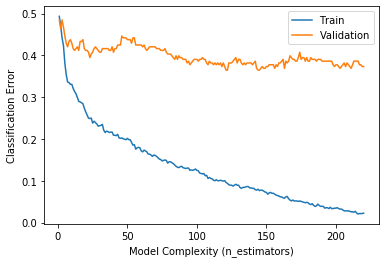

In [281]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

In [164]:
print('Baseline for y3_train ', accuracy_score(y3_test, y3_pred))
pipeline.fit(X_train, y3_train)
print('Validation Accuracy', pipeline.score(X_test, y3_test))

Baseline for y3_train  0.296137339055794
Validation Accuracy 0.5579399141630901


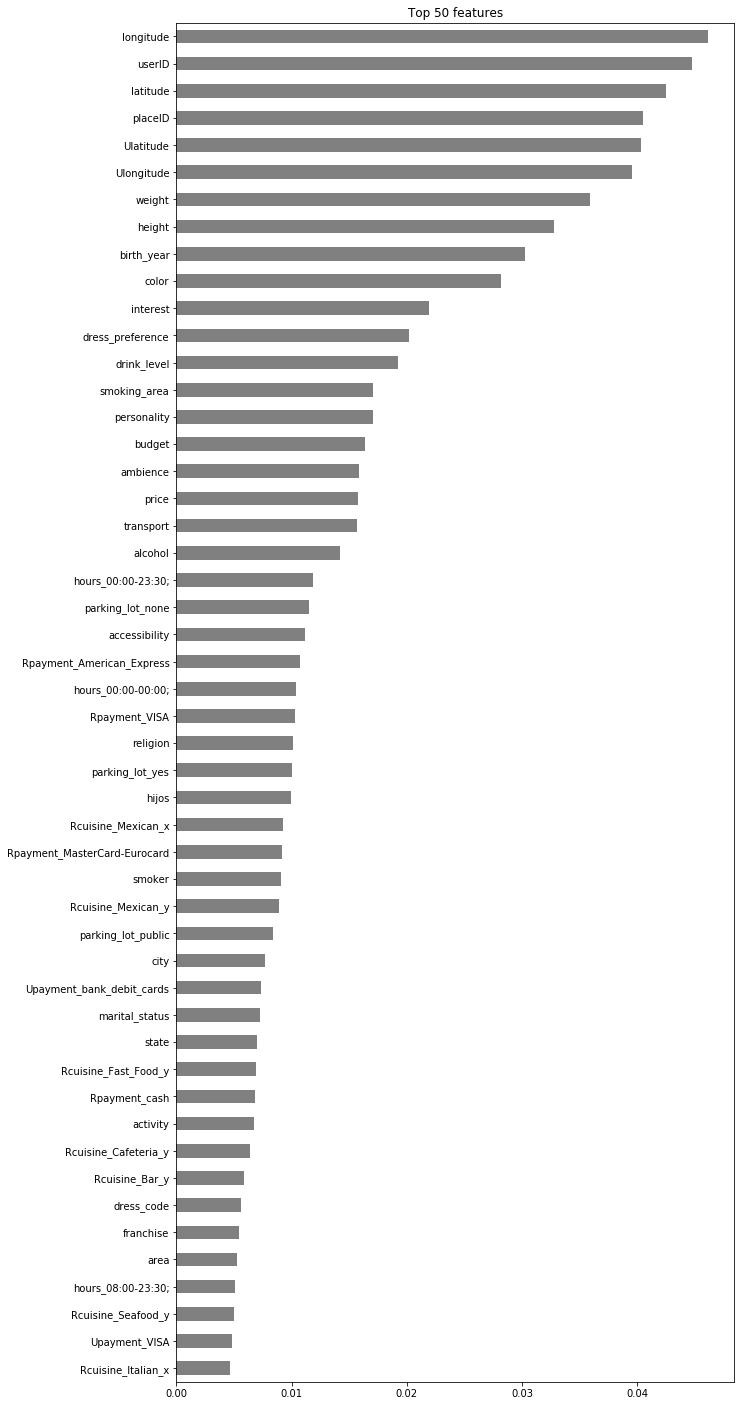

In [165]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [167]:
model.fit(X_train_transformed, y3_train)

permuter.fit(X_test_transformed, y3_test)

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0180 ± 0.0206,weight
0.0137 ± 0.0148,height
0.0120 ± 0.0034,Rcuisine_International_y
0.0069 ± 0.0042,dress_code
0.0043 ± 0.0077,hours_00:00-00:00;
0.0043 ± 0.0000,Rpayment_bank_debit_cards
0.0043 ± 0.0094,Rpayment_American_Express
0.0034 ± 0.0084,Rcuisine_Cafeteria_x
0.0026 ± 0.0042,franchise
0.0026 ± 0.0069,activity


In [192]:
print('Shape before removing features:', X_train.shape)
minimum_importance = -0
mask = permuter.feature_importances_ > minimum_importance
neg_mask = permuter.feature_importances_ < minimum_importance
features3 = X_train.columns[mask]
X3_train = X_train[features3].copy()

print('Shape after removing features:', X3_train.shape)

Shape before removing features: (928, 495)
Shape after removing features: (928, 30)


In [194]:
X3_test = X_test[features3].copy()

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    #SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X3_train, y3_train)
print('Validation Accuracy', pipeline.score(X3_test, y3_test))

Validation Accuracy 0.5665236051502146


In [310]:
encoder = ce.OrdinalEncoder()
X3_train_encoded = encoder.fit_transform(X3_train)
X3_test_encoded = encoder.transform(X3_test)

eval_set = [(X3_train_encoded, y3_train), 
            (X3_test_encoded, y3_test)]

model = XGBClassifier(
    n_estimators=10000, # <= 1000 trees, depends on early stopping
    max_depth=5,       # try deeper trees because of high cardinality categoricals
    learning_rate=.01, # try higher learning rate
    n_jobs=-1
)

model.fit(X3_train_encoded, y3_train, eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds=500)

[0]	validation_0-merror:0.382543	validation_1-merror:0.472103
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 500 rounds.
[1]	validation_0-merror:0.380388	validation_1-merror:0.467811
[2]	validation_0-merror:0.380388	validation_1-merror:0.467811
[3]	validation_0-merror:0.380388	validation_1-merror:0.467811
[4]	validation_0-merror:0.380388	validation_1-merror:0.467811
[5]	validation_0-merror:0.380388	validation_1-merror:0.467811
[6]	validation_0-merror:0.380388	validation_1-merror:0.480687
[7]	validation_0-merror:0.381466	validation_1-merror:0.476395
[8]	validation_0-merror:0.37931	validation_1-merror:0.476395
[9]	validation_0-merror:0.376078	validation_1-merror:0.467811
[10]	validation_0-merror:0.375	validation_1-merror:0.467811
[11]	validation_0-merror:0.380388	validation_1-merror:0.467811
[12]	validation_0-merror:0.380388	validation_1-merror:0.467811
[13]	validation_0-merror:0.3760

[128]	validation_0-merror:0.328664	validation_1-merror:0.433476
[129]	validation_0-merror:0.328664	validation_1-merror:0.433476
[130]	validation_0-merror:0.328664	validation_1-merror:0.433476
[131]	validation_0-merror:0.328664	validation_1-merror:0.433476
[132]	validation_0-merror:0.328664	validation_1-merror:0.433476
[133]	validation_0-merror:0.328664	validation_1-merror:0.433476
[134]	validation_0-merror:0.329741	validation_1-merror:0.437768
[135]	validation_0-merror:0.326509	validation_1-merror:0.433476
[136]	validation_0-merror:0.325431	validation_1-merror:0.433476
[137]	validation_0-merror:0.327586	validation_1-merror:0.437768
[138]	validation_0-merror:0.327586	validation_1-merror:0.437768
[139]	validation_0-merror:0.327586	validation_1-merror:0.437768
[140]	validation_0-merror:0.326509	validation_1-merror:0.437768
[141]	validation_0-merror:0.326509	validation_1-merror:0.437768
[142]	validation_0-merror:0.326509	validation_1-merror:0.437768
[143]	validation_0-merror:0.326509	valid

[257]	validation_0-merror:0.288793	validation_1-merror:0.433476
[258]	validation_0-merror:0.288793	validation_1-merror:0.433476
[259]	validation_0-merror:0.287716	validation_1-merror:0.433476
[260]	validation_0-merror:0.287716	validation_1-merror:0.433476
[261]	validation_0-merror:0.287716	validation_1-merror:0.437768
[262]	validation_0-merror:0.287716	validation_1-merror:0.437768
[263]	validation_0-merror:0.287716	validation_1-merror:0.437768
[264]	validation_0-merror:0.287716	validation_1-merror:0.437768
[265]	validation_0-merror:0.287716	validation_1-merror:0.437768
[266]	validation_0-merror:0.288793	validation_1-merror:0.437768
[267]	validation_0-merror:0.288793	validation_1-merror:0.437768
[268]	validation_0-merror:0.286638	validation_1-merror:0.437768
[269]	validation_0-merror:0.286638	validation_1-merror:0.437768
[270]	validation_0-merror:0.286638	validation_1-merror:0.437768
[271]	validation_0-merror:0.28556	validation_1-merror:0.437768
[272]	validation_0-merror:0.284483	valida

[386]	validation_0-merror:0.268319	validation_1-merror:0.446352
[387]	validation_0-merror:0.267241	validation_1-merror:0.446352
[388]	validation_0-merror:0.266164	validation_1-merror:0.446352
[389]	validation_0-merror:0.265086	validation_1-merror:0.446352
[390]	validation_0-merror:0.266164	validation_1-merror:0.446352
[391]	validation_0-merror:0.266164	validation_1-merror:0.446352
[392]	validation_0-merror:0.264009	validation_1-merror:0.446352
[393]	validation_0-merror:0.262931	validation_1-merror:0.446352
[394]	validation_0-merror:0.260776	validation_1-merror:0.44206
[395]	validation_0-merror:0.259698	validation_1-merror:0.44206
[396]	validation_0-merror:0.259698	validation_1-merror:0.44206
[397]	validation_0-merror:0.259698	validation_1-merror:0.44206
[398]	validation_0-merror:0.260776	validation_1-merror:0.44206
[399]	validation_0-merror:0.260776	validation_1-merror:0.44206
[400]	validation_0-merror:0.261853	validation_1-merror:0.446352
[401]	validation_0-merror:0.260776	validation_

[515]	validation_0-merror:0.255388	validation_1-merror:0.433476
[516]	validation_0-merror:0.25431	validation_1-merror:0.433476
[517]	validation_0-merror:0.255388	validation_1-merror:0.433476
[518]	validation_0-merror:0.255388	validation_1-merror:0.433476
[519]	validation_0-merror:0.255388	validation_1-merror:0.433476
[520]	validation_0-merror:0.25431	validation_1-merror:0.429185
[521]	validation_0-merror:0.255388	validation_1-merror:0.429185
[522]	validation_0-merror:0.255388	validation_1-merror:0.429185
[523]	validation_0-merror:0.255388	validation_1-merror:0.429185
[524]	validation_0-merror:0.255388	validation_1-merror:0.429185
[525]	validation_0-merror:0.255388	validation_1-merror:0.429185
[526]	validation_0-merror:0.255388	validation_1-merror:0.429185
[527]	validation_0-merror:0.256466	validation_1-merror:0.429185
[528]	validation_0-merror:0.256466	validation_1-merror:0.424893
[529]	validation_0-merror:0.256466	validation_1-merror:0.424893
[530]	validation_0-merror:0.256466	validat

[645]	validation_0-merror:0.243534	validation_1-merror:0.420601
[646]	validation_0-merror:0.243534	validation_1-merror:0.420601
[647]	validation_0-merror:0.243534	validation_1-merror:0.420601
[648]	validation_0-merror:0.242457	validation_1-merror:0.420601
[649]	validation_0-merror:0.242457	validation_1-merror:0.420601
[650]	validation_0-merror:0.242457	validation_1-merror:0.420601
[651]	validation_0-merror:0.242457	validation_1-merror:0.420601
[652]	validation_0-merror:0.243534	validation_1-merror:0.420601
[653]	validation_0-merror:0.242457	validation_1-merror:0.420601
[654]	validation_0-merror:0.243534	validation_1-merror:0.420601
[655]	validation_0-merror:0.243534	validation_1-merror:0.420601
[656]	validation_0-merror:0.243534	validation_1-merror:0.420601
[657]	validation_0-merror:0.243534	validation_1-merror:0.420601
[658]	validation_0-merror:0.243534	validation_1-merror:0.420601
[659]	validation_0-merror:0.243534	validation_1-merror:0.420601
[660]	validation_0-merror:0.243534	valid

[774]	validation_0-merror:0.234914	validation_1-merror:0.412017
[775]	validation_0-merror:0.234914	validation_1-merror:0.412017
[776]	validation_0-merror:0.234914	validation_1-merror:0.403433
[777]	validation_0-merror:0.234914	validation_1-merror:0.403433
[778]	validation_0-merror:0.234914	validation_1-merror:0.403433
[779]	validation_0-merror:0.234914	validation_1-merror:0.403433
[780]	validation_0-merror:0.234914	validation_1-merror:0.403433
[781]	validation_0-merror:0.234914	validation_1-merror:0.403433
[782]	validation_0-merror:0.234914	validation_1-merror:0.403433
[783]	validation_0-merror:0.234914	validation_1-merror:0.403433
[784]	validation_0-merror:0.234914	validation_1-merror:0.403433
[785]	validation_0-merror:0.234914	validation_1-merror:0.403433
[786]	validation_0-merror:0.234914	validation_1-merror:0.403433
[787]	validation_0-merror:0.234914	validation_1-merror:0.403433
[788]	validation_0-merror:0.234914	validation_1-merror:0.403433
[789]	validation_0-merror:0.233836	valid

[903]	validation_0-merror:0.22306	validation_1-merror:0.420601
[904]	validation_0-merror:0.22306	validation_1-merror:0.420601
[905]	validation_0-merror:0.22306	validation_1-merror:0.420601
[906]	validation_0-merror:0.22306	validation_1-merror:0.420601
[907]	validation_0-merror:0.221983	validation_1-merror:0.420601
[908]	validation_0-merror:0.221983	validation_1-merror:0.420601
[909]	validation_0-merror:0.220905	validation_1-merror:0.420601
[910]	validation_0-merror:0.220905	validation_1-merror:0.424893
[911]	validation_0-merror:0.220905	validation_1-merror:0.420601
[912]	validation_0-merror:0.219828	validation_1-merror:0.420601
[913]	validation_0-merror:0.220905	validation_1-merror:0.420601
[914]	validation_0-merror:0.220905	validation_1-merror:0.420601
[915]	validation_0-merror:0.219828	validation_1-merror:0.424893
[916]	validation_0-merror:0.219828	validation_1-merror:0.424893
[917]	validation_0-merror:0.219828	validation_1-merror:0.424893
[918]	validation_0-merror:0.219828	validatio

[1031]	validation_0-merror:0.212284	validation_1-merror:0.416309
[1032]	validation_0-merror:0.212284	validation_1-merror:0.416309
[1033]	validation_0-merror:0.212284	validation_1-merror:0.416309
[1034]	validation_0-merror:0.212284	validation_1-merror:0.416309
[1035]	validation_0-merror:0.212284	validation_1-merror:0.416309
[1036]	validation_0-merror:0.211207	validation_1-merror:0.416309
[1037]	validation_0-merror:0.210129	validation_1-merror:0.416309
[1038]	validation_0-merror:0.209052	validation_1-merror:0.416309
[1039]	validation_0-merror:0.209052	validation_1-merror:0.416309
[1040]	validation_0-merror:0.209052	validation_1-merror:0.416309
[1041]	validation_0-merror:0.209052	validation_1-merror:0.416309
[1042]	validation_0-merror:0.209052	validation_1-merror:0.416309
[1043]	validation_0-merror:0.209052	validation_1-merror:0.416309
[1044]	validation_0-merror:0.207974	validation_1-merror:0.416309
[1045]	validation_0-merror:0.207974	validation_1-merror:0.416309
[1046]	validation_0-merro

[1158]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1159]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1160]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1161]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1162]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1163]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1164]	validation_0-merror:0.206897	validation_1-merror:0.433476
[1165]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1166]	validation_0-merror:0.206897	validation_1-merror:0.429185
[1167]	validation_0-merror:0.206897	validation_1-merror:0.433476
[1168]	validation_0-merror:0.206897	validation_1-merror:0.433476
[1169]	validation_0-merror:0.206897	validation_1-merror:0.433476
[1170]	validation_0-merror:0.206897	validation_1-merror:0.433476
[1171]	validation_0-merror:0.205819	validation_1-merror:0.433476
[1172]	validation_0-merror:0.205819	validation_1-merror:0.433476
[1173]	validation_0-merro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

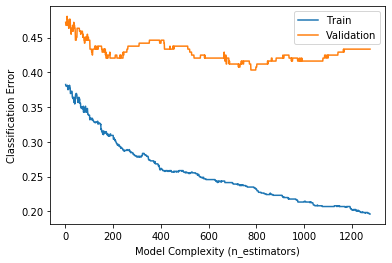

In [311]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();